# Nishkarsh Gupta

# Task 3:- " Perform ‘Exploratory Data Analysis’ on dataset SampleSuperstore"

### Lets look at the data of a superstore in US and get some insights from it.



### IMPORTING LIBRARIES

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## READING THE DATA


### Lets us read the data and take a look at first few rows.

In [194]:
df=pd.read_csv("C:/Users/Nishkarsh/Downloads/SampleSuperstore.csv")

In [195]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## EXPLORATORY DATA ANALYSIS

In [196]:
#row,column count of data
df.shape

(9994, 13)

In [197]:
#column names of table
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [198]:
#check data type of columns/attributes
df.dtypes
  

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

#### Lets check if there are any missing values in the data

In [199]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There are no missing values. Hence we can go exploratory analysis part directly.

In [200]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

### Clearly the data is for US country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [201]:
#dropping Country column
df=df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### We can analyse the data Through PRODUCT LEVEL ANALYSIS




#### Lets look at the product categories available to shop for customers

In [202]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [203]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [204]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [205]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

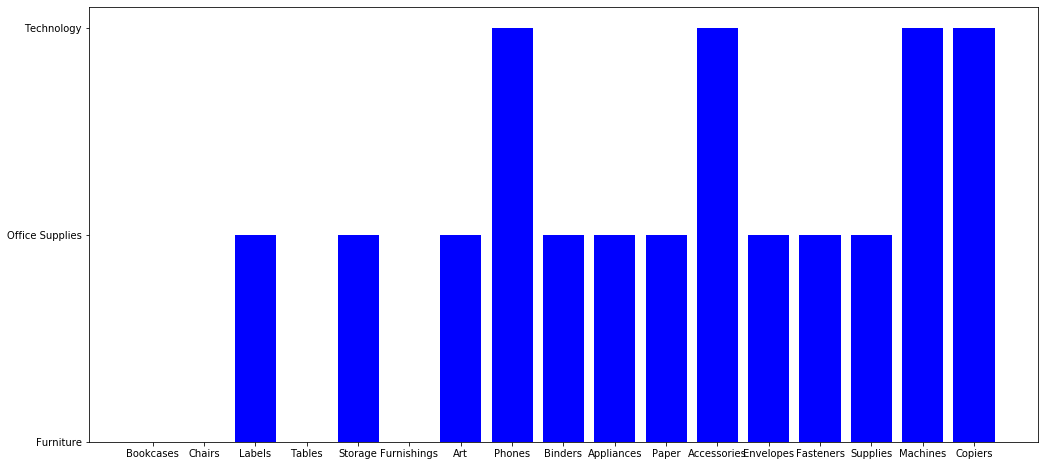

In [206]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(17,8))
plt.bar('Sub-Category','Category',data=df,color='blue')
plt.show()

### From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

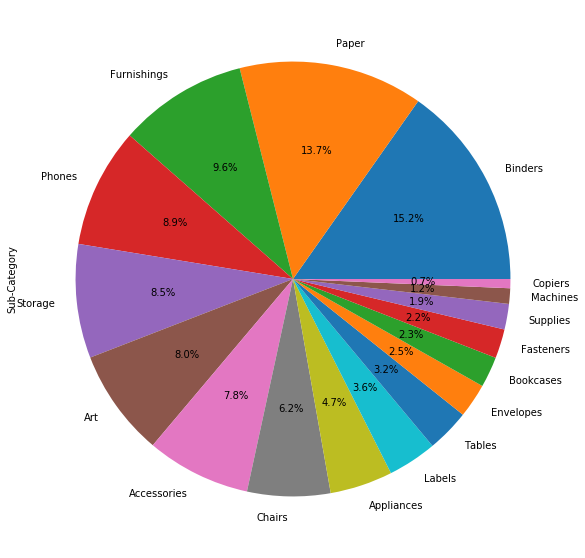

In [207]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### The store has wide variety of Office Supplies especially in Binders and Paper department.

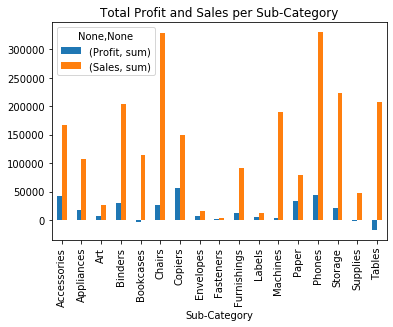

In [208]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

### Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

### Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore.Hence these departments are in loss.

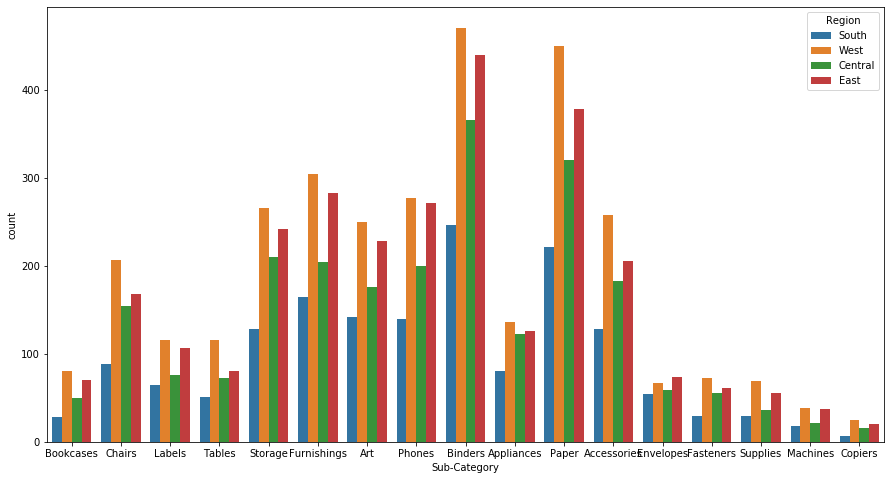

In [209]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People residing in Western part of US tend to order more from superstore.

To understand the data better. Lets create some new columns like Cost,Profit%

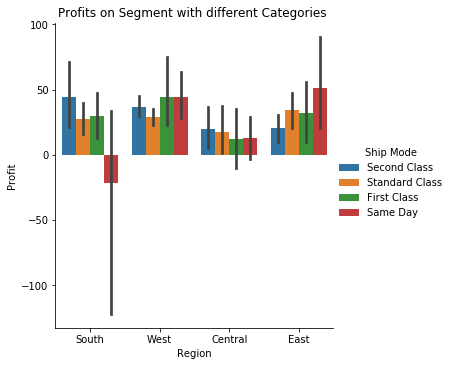

In [210]:
# Profit as per Ship Mode
sns.catplot(x="Region", y="Profit", kind="bar",hue='Ship Mode', data=df)
plt.title('Profits on Segment with different Categories ')
plt.show()


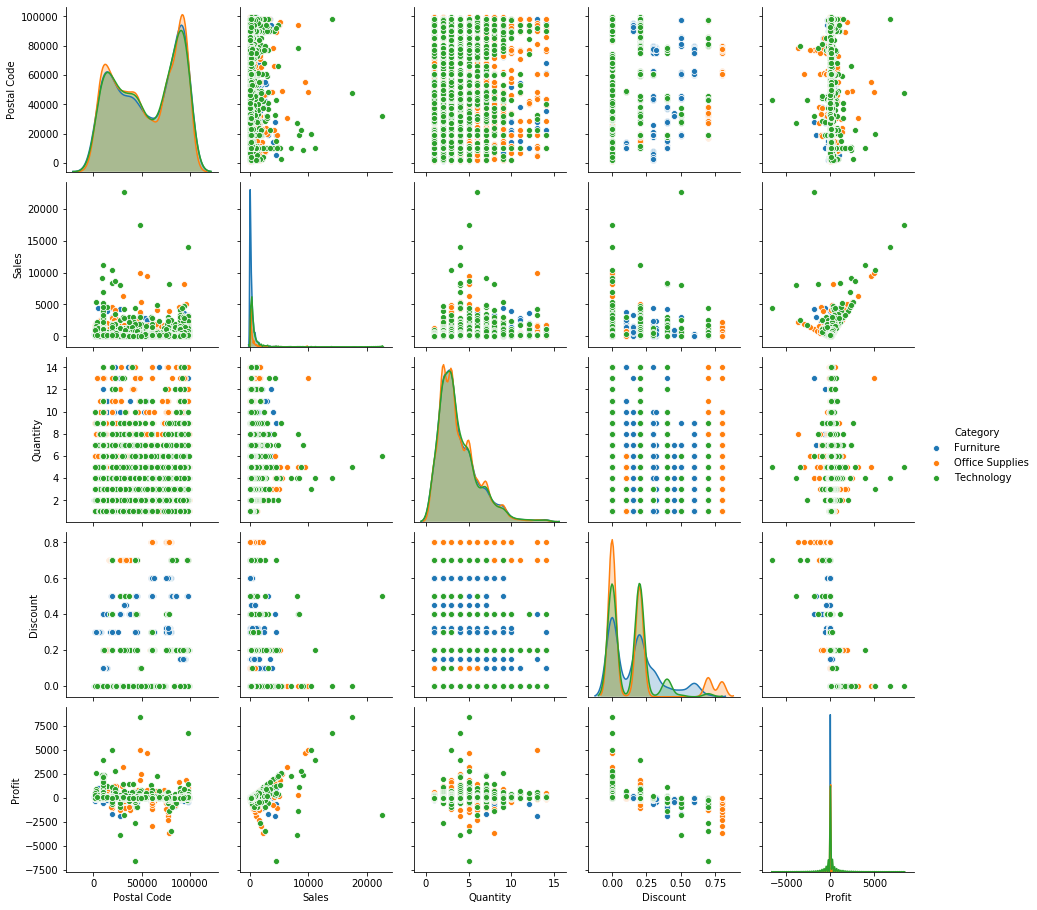

In [211]:
sns.pairplot(df ,hue='Category')

In [212]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [213]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [214]:
#Profit Percentage of first  Top 5 product names
print(df.iloc[[0,1,2,3,4],[6,7,13]])

          Category Sub-Category   Profit %
0        Furniture    Bookcases  19.047619
1        Furniture       Chairs  42.857143
2  Office Supplies       Labels  88.679245
3        Furniture       Tables -28.571429
4  Office Supplies      Storage  12.676056


In [215]:
#Products with high Profit Percentage
df.sort_values(by=(['Profit %','Category','Sub-Category']),ascending=False).head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.98,2,0.0,52.490,52.490,100.0
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.10,2,0.0,39.550,39.550,100.0
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.80,4,0.0,43.900,43.900,100.0
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.98,2,0.0,1995.990,1995.990,100.0
4029,Standard Class,Consumer,Lafayette,Louisiana,70506,South,Technology,Machines,479.97,3,0.0,239.985,239.985,100.0
5068,Standard Class,Home Office,Trenton,Michigan,48183,Central,Technology,Copiers,549.99,1,0.0,274.995,274.995,100.0
5850,Standard Class,Home Office,Roseville,Minnesota,55113,Central,Technology,Copiers,549.99,1,0.0,274.995,274.995,100.0
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.88,6,0.0,23.940,23.940,100.0
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.96,7,0.0,25.480,25.480,100.0
720,Standard Class,Home Office,Los Angeles,California,90045,West,Office Supplies,Paper,146.82,3,0.0,73.410,73.410,100.0


## Retailers selling Phone,Machines,Copiers,Papers have got 100% Profit in their Business.

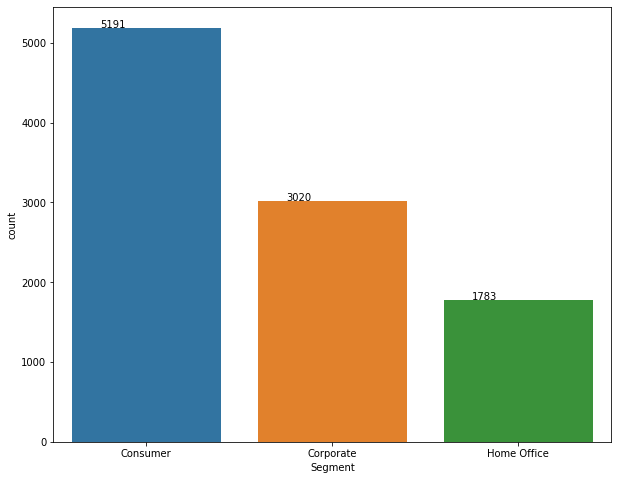

In [216]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

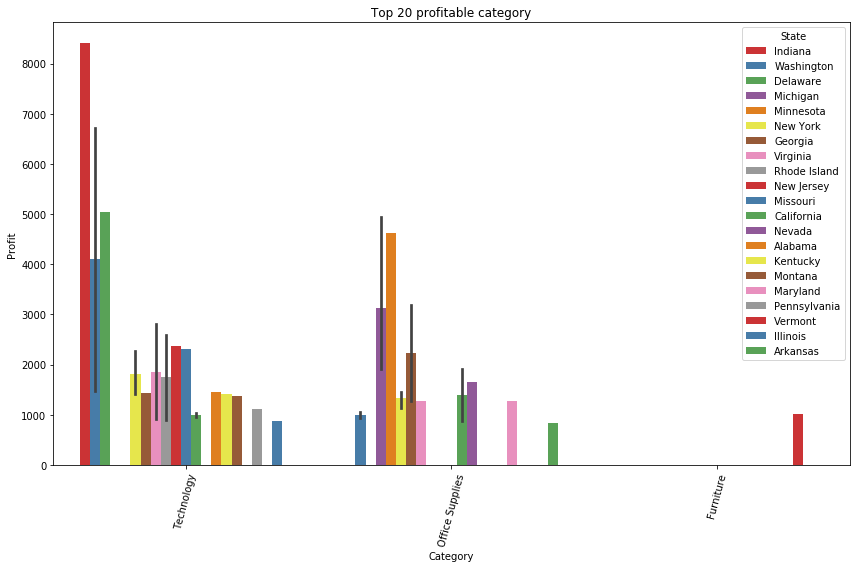

In [217]:
#Top 50 category which benefitted from the state as per  store
sortedTop50 = df.sort_values(['Profit'], ascending=False).head(50)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Category', y='Profit',hue='State',palette='Set1', data=sortedTop50, ax=ax)
ax.set_title("Top 20 profitable category")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

We see that majority of the Profitable Customers are from Indiana, California and Minnesota State.

Lets do some do some Analysis with Order details of the data

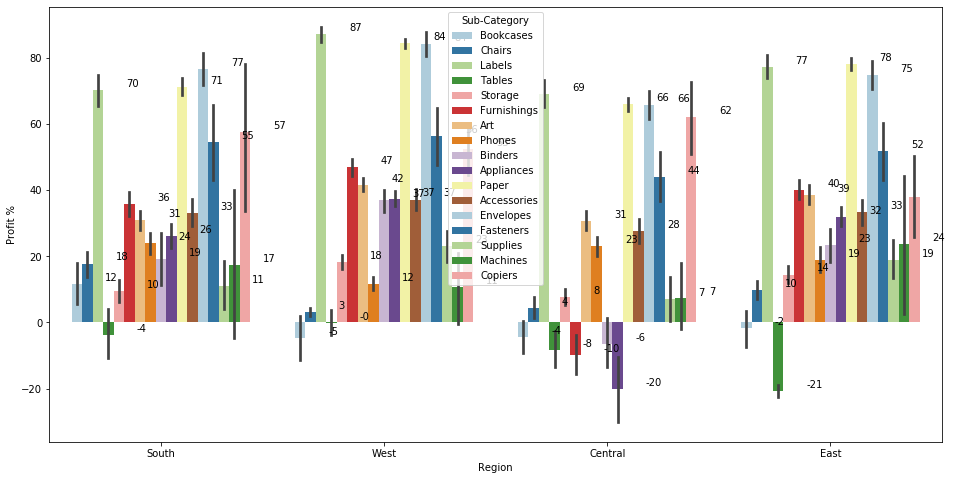

In [218]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('Region','Profit %',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

Text(0.5, 1.0, 'Category and Segment wise Total Sales & % of profit gained')

<Figure size 1080x720 with 0 Axes>

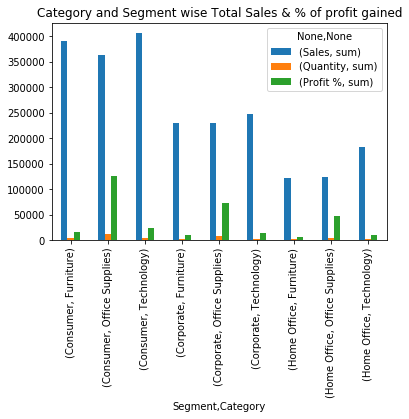

In [219]:
#Sales  as per year Category and Segment
plt.figure(figsize=(15,10))
df.groupby(['Segment','Category'])['Sales','Quantity','Profit %'].agg(['sum']).plot(kind='bar')
plt.title('Category and Segment wise Total Sales & % of profit gained')

## Sales of the store has increased due to the Consumer products resulting in high profit margin.

## Task- 3 Completed

## Thank you